In [157]:
# importing libraries  
import numpy as nm #Mathematical Operations & Linear Algebra
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import csv



In [158]:
#importing datasets  
data_set= pd.read_csv('/home/prince/Desktop/projects/machine-learning/User_Data.csv')  

In [159]:
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values


In [160]:
# Check for null values in the DataFrame
null_values = data_set.isnull().sum()

print(null_values)


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [161]:

# Step 2: Count the null values
null_counts = null_values.sum()


In [162]:

# Display the count of null values
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
0


In [163]:
# Option 1: Drop rows with null values
data_without_nulls = data_set.dropna()


In [164]:

# Option 2: Drop columns with null values
data_without_nulls = data_set.dropna(axis=1)

In [165]:
data_without_nulls

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [166]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


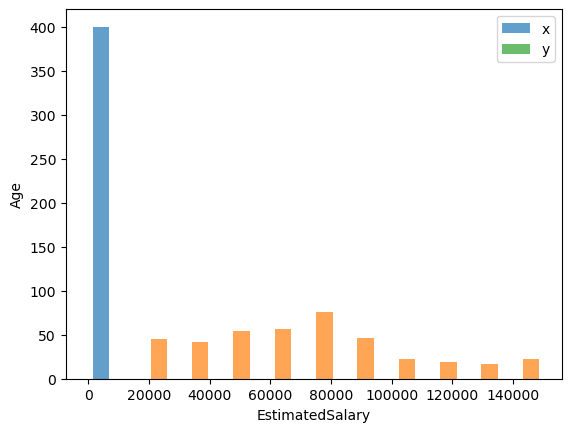

In [167]:

plt.hist(x, bins='auto', alpha=0.7, label='x')
plt.hist(y, bins='auto', alpha=0.7, label='y')
plt.legend()
plt.ylabel('Age')
plt.xlabel('EstimatedSalary')
plt.show()

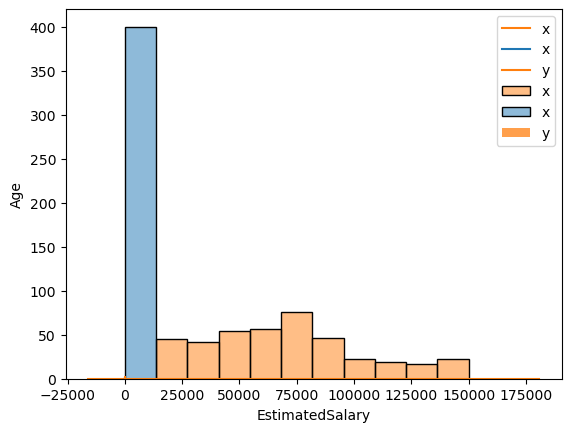

In [168]:

sns.histplot(x, bins='auto', kde=False, label='x')
sns.histplot(y, bins='auto', kde=False, label='y')

sns.kdeplot(x, label='x')
sns.kdeplot(y, label='y')

plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()


plt.show()

In [169]:

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  

In [170]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [171]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [172]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  


In [177]:



# Assuming you have a NumPy array named 'y_pred'
y_pred = y_pred

# Specify the filename for the CSV file
filename = 'y_pred.csv'

# Convert the NumPy array to a list before writing to CSV
data = y_pred.tolist()

# Write the data to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(data)

In [174]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [175]:
cm

array([[73,  6],
       [ 5, 36]])

In [147]:
report = classification_report(y_test, y_pred)


In [148]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        79
           1       0.90      0.88      0.89        41

    accuracy                           0.93       120
   macro avg       0.92      0.91      0.92       120
weighted avg       0.92      0.93      0.92       120



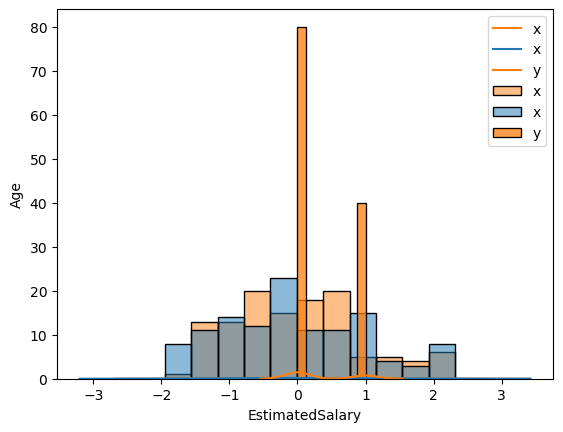

In [149]:

sns.histplot(x_test, bins='auto', kde=False, label='x')
sns.histplot(y_pred, bins='auto', kde=False, label='y')

sns.kdeplot(x_test, label='x')
sns.kdeplot(y_pred, label='y')

plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()

plt.show()

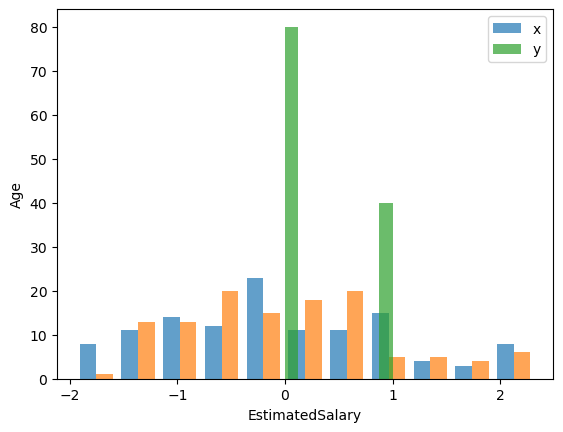

In [152]:
plt.hist(x_test, bins='auto', alpha=0.7, label='x')
plt.hist(y_pred, bins='auto', alpha=0.7, label='y')
plt.legend()
plt.ylabel('Age')
plt.xlabel('EstimatedSalary')
plt.savefig('data_user_exporting.pdf', dpi=300)

plt.show()

/tmp/ipykernel_12705/2493468862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test, hist=False)
/tmp/ipykernel_12705/2493468862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False)


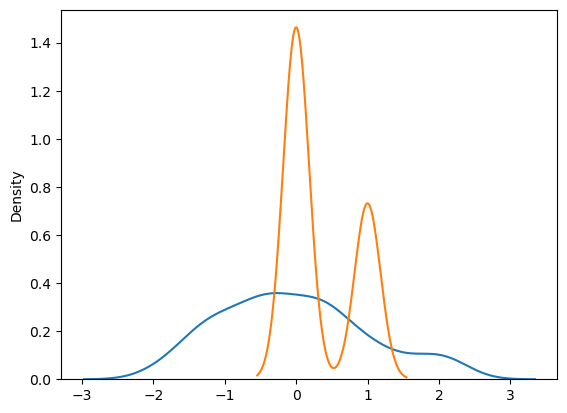

In [151]:
sns.distplot(x_test, hist=False)
sns.distplot(y_pred, hist=False)


plt.show()